In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle

In [186]:
pf = pd.read_csv('../Data/median_data.csv')
print(pf)

     Unnamed: 0     video id  Question 2: Sound (1-5)  \
0             0  3gJ_14U5mdY                      4.0   
1             1  r1BzB2-Cx7k                      3.0   
2             2  otns7IbEAaY                      3.0   
3             3  pCh4iq0kj3g                      4.0   
4             4  cTOaJzEgXmg                      3.0   
..          ...          ...                      ...   
130         130  8yBn-c8__Tk                      2.0   
131         131  QXGyszq4pic                      3.0   
132         132  QXR-hOL5fFs                      3.0   
133         133  iGgDCb7ZVdA                      3.0   
134         134  bPkoL622W1U                      3.0   

     Question 2.1: Music (1-5)  Question 2.2 : Noise control (1-5)  \
0                          4.0                                 4.0   
1                          4.0                                 2.0   
2                          4.0                                 2.0   
3                          4.0     

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

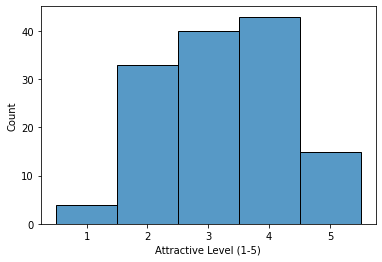

In [187]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [188]:
# for x in pf.columns:
#     try:
#         plt.plot(pf[x],pf["Attractive Level (1-5)"], 'ro')
#         plt.show()
#     except:
#         pass

In [189]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [190]:
X_train, X_test, y_train, y_test = train_test_split(pf[core_columns][:], pf[output_column][:], test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(108, 5)
(27, 5)


In [191]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf.fit(X_train, y_train)
pickle.dump(clf, open('./Decision_Tree_model', 'wb'))
print('Decision tree:')
print('train accuracy: ',clf.score(X_train, y_train))
print('test accuracy: ',clf.score(X_test, y_test))

Decision tree:
train accuracy:  0.8148148148148148
test accuracy:  0.7407407407407407


In [192]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1, solver="lbfgs", max_iter=1e4)
y1 = y_train.copy()
y1[y1 < 3] = 0
y1[y1 >= 3] = 1
y2 = y_test.copy()
y2[y2 < 3] = 0
y2[y2 >= 3] = 1
clf.fit(X_train, y1)
pickle.dump(clf, open('./Logistic_Regression_model', 'wb'))
print('Logistic Regression:')

print('train accuracy: ',f1_score(clf.predict(X_train), y1, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y2, average='macro'))

Logistic Regression:
train accuracy:  0.8286620835536753
test accuracy:  0.828752642706131


Linear Regression:
train accuracy:  0.599741935483871
test accuracy:  0.7966310160427807


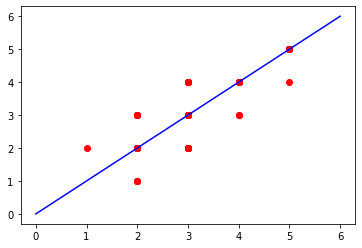

In [193]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
print('Linear Regression:')
result = clf.predict(X_train).round()
pickle.dump(clf, open('./Linear_Regression_model', 'wb'))
plt.plot(result, y_train, 'ro')
plt.plot([0,6],[0,6], 'b-')
# TF = result == y_train
# score = len(TF[TF == True]) / len(TF)

print('train accuracy: ', f1_score(result, y_train, average='macro'))

result = clf.predict(X_test).round()
# TF = result == y_test
# score = len(TF[TF == True]) / len(TF)
print('test accuracy: ', f1_score(result, y_test, average='macro'))

In [194]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(20, 20, 20))
clf.fit(X_train, y_train)
pickle.dump(clf, open('./MLP_model', 'wb'))
print('Multilayer Perceptron:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

Multilayer Perceptron:
train accuracy:  0.6132597202077388
test accuracy:  0.5808020050125313


/home/nghiatnh/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [195]:
from sklearn.svm import SVC
clf = SVC(C=1)
clf.fit(X_train, y_train)
pickle.dump(clf, open('./SVM_model', 'wb'))
print('Support Vector Machine:')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))


Support Vector Machine:
train accuracy:  0.6503688454280322
test accuracy:  0.5216959511077157


In [196]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
pickle.dump(clf, open('./KNN_model', 'wb'))

print('KNN')

print('train accuracy: ',f1_score(clf.predict(X_train), y_train, average='macro'))
print('test accuracy: ',f1_score(clf.predict(X_test), y_test, average='macro'))

KNN
train accuracy:  0.6060515873015873
test accuracy:  0.4762698412698413


In [197]:
print(pickle.load(open('./KNN_model', 'rb')))

KNeighborsClassifier()
